In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv(r"C:\Users\USER\Desktop\m5-forecasting-accuracy\calendar.csv")
sales_eval = pd.read_csv(r"C:\Users\USER\Desktop\m5-forecasting-accuracy\sales_train_evaluation.csv")
sales_val = pd.read_csv(r"C:\Users\USER\Desktop\m5-forecasting-accuracy\sales_train_validation.csv")
prices = pd.read_csv(r"C:\Users\USER\Desktop\m5-forecasting-accuracy\sell_prices.csv")
submission = pd.read_csv(r"C:\Users\USER\Desktop\m5-forecasting-accuracy\sample_submission.csv")


In [3]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [4]:
sales_eval

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [5]:
sales_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [6]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [7]:
submission

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [9]:

sales_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [10]:
sales_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [11]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [12]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60980 entries, 0 to 60979
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60980 non-null  object
 1   F1      60980 non-null  int64 
 2   F2      60980 non-null  int64 
 3   F3      60980 non-null  int64 
 4   F4      60980 non-null  int64 
 5   F5      60980 non-null  int64 
 6   F6      60980 non-null  int64 
 7   F7      60980 non-null  int64 
 8   F8      60980 non-null  int64 
 9   F9      60980 non-null  int64 
 10  F10     60980 non-null  int64 
 11  F11     60980 non-null  int64 
 12  F12     60980 non-null  int64 
 13  F13     60980 non-null  int64 
 14  F14     60980 non-null  int64 
 15  F15     60980 non-null  int64 
 16  F16     60980 non-null  int64 
 17  F17     60980 non-null  int64 
 18  F18     60980 non-null  int64 
 19  F19     60980 non-null  int64 
 20  F20     60980 non-null  int64 
 21  F21     60980 non-null  int64 
 22  F22     60980 non-null

In [13]:
calendar.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [14]:
prices.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [15]:
sales_val.isnull().sum().head()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
dtype: int64

In [16]:
sales_eval.isnull().sum().head()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
dtype: int64

In [17]:
submission.isnull().sum()

id     0
F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
F22    0
F23    0
F24    0
F25    0
F26    0
F27    0
F28    0
dtype: int64

In [18]:
calendar.shape

(1969, 14)

In [19]:
sales_eval.shape

(30490, 1947)

In [20]:
sales_val.shape

(30490, 1919)

In [21]:
prices.shape

(6841121, 4)

In [22]:
calendar["date"] = pd.to_datetime(calendar["date"])

In [23]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    object        
 8   event_type_1  162 non-null    object        
 9   event_name_2  5 non-null      object        
 10  event_type_2  5 non-null      object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [25]:
calendar["event_name_1"].fillna("No_Event", inplace=True)
calendar["event_type_1"].fillna("No_Event", inplace=True)

calendar["event_name_2"].fillna("No_Event", inplace=True)
calendar["event_type_2"].fillna("No_Event", inplace=True)

Many days do not have any events or holidays.

The missing values in event columns represent normal days.

Instead of removing these rows, we replace missing values with "No_Event" to keep all dates and maintain data continuity.

In [26]:
calendar.isnull().sum()

date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
d               0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
dtype: int64

In [27]:
calendar.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,No_Event,No_Event,No_Event,No_Event,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,No_Event,No_Event,No_Event,No_Event,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,No_Event,No_Event,No_Event,No_Event,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,No_Event,No_Event,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,No_Event,No_Event,No_Event,No_Event,1,1,0


In [28]:
#COMBINE SALES FILES
sales_all = pd.concat([sales_eval, sales_val], axis=0)

Right now:

sales_eval and sales_val are in wide format:

d_1  d_2  d_3 ... d_1900+

This is NOT good for analysis.

We must convert to long format.

But before that, we combine both sales files.

The sales data is split into evaluation and validation periods.

This step combines both datasets into a single dataset to create a complete sales history for analysis.

This allows us to analyze trends across the full time range.

In [29]:
sales_all.shape

(60980, 1947)

In [30]:
#CONVERT SALES DATA TO LONG FORMAT
sales_long = sales_all.melt(
    id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"],
    var_name="day",
    value_name="sales"
)

The sales data is originally in wide format where each day is a separate column.
    
This step transforms the data into long format where each row represents sales of a product on a specific day.

Long format is required for time-series analysis and merging with calendar data.

In [31]:
sales_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0.0


In [32]:
sales_long.shape

(118362180, 8)

In [33]:
sales_sample = sales_long[sales_long["state_id"] == "CA"]

In [34]:
sales_sample.shape

(47344872, 8)

In [35]:
merged_data = sales_sample.merge(
    calendar,
    left_on="day",
    right_on="d",
    how="left"
)

In [36]:
merged_data = merged_data.merge(
    prices,
    on=["store_id", "item_id", "wm_yr_wk"],
    how="left"
)

In [37]:
sales_sample = sales_long[sales_long["cat_id"] == "FOODS"]

In [38]:
sales_agg = sales_long.groupby(
    ["day", "item_id", "store_id", "state_id", "cat_id"]
)["sales"].sum().reset_index()

It groups all sales by:

• day
• product
• store
• category

And calculates total sales.

This removes unnecessary row-level repetition.

This step aggregates daily sales data by product, store, and category.

Instead of keeping individual row-level records, it summarizes total sales per day.

This significantly reduces dataset size and improves performance while preserving meaningful business information.

In [39]:
sales_agg.shape

(59181090, 6)

In [40]:
merged_data["sales"] = pd.to_numeric(merged_data["sales"], errors="coerce")

In [41]:
merged_data["sales"].dtype


dtype('float64')

In [42]:
#MERGE WITH CALENDAR
merged_data = sales_agg.merge(
    calendar,
    left_on="day",
    right_on="d",
    how="left"
)

This step connects aggregated sales data with calendar information such as actual dates, events, and holidays.

It allows analysis of time trends and the impact of special events on sales.

In [43]:
#FILTER PRICES BEFORE MERGE
needed_prices = prices.merge(
    merged_data[["store_id", "item_id", "wm_yr_wk"]].drop_duplicates(),
    on=["store_id", "item_id", "wm_yr_wk"],
    how="inner"
)

The prices dataset is very large and contains records not required for the current analysis.
    
This step filters the price table to include only relevant product-store-week combinations present in the sales data.
    
This significantly reduces memory usage and improves merge efficiency.

In [44]:
#verall Sales Trend Over Time
daily_sales = merged_data.groupby("date")["sales"].sum().reset_index()
daily_sales.head()


,date,sales
0,2011-01-29,65262.0
1,2011-01-30,63498.0
2,2011-01-31,47566.0
3,2011-02-01,50824.0
4,2011-02-02,38292.0


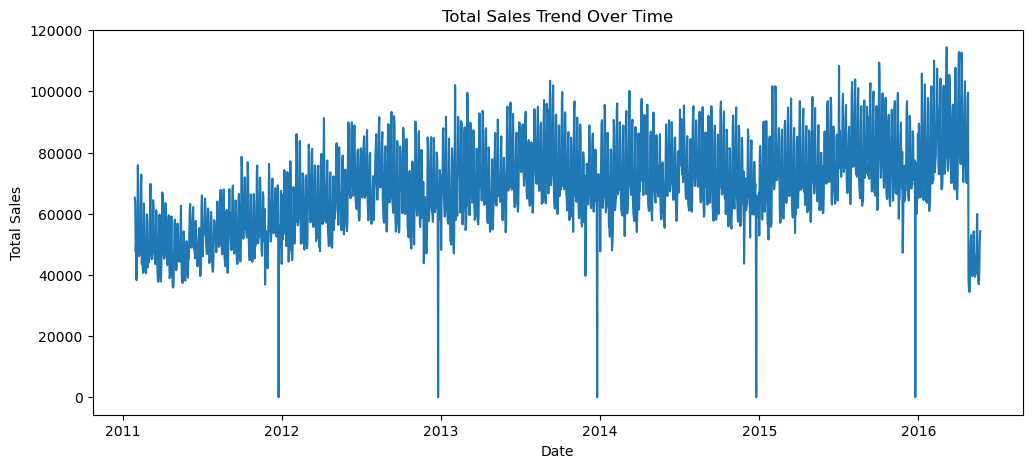

In [45]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales["date"], daily_sales["sales"])
plt.title("Total Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

This step groups sales data by date and calculates total daily sales across all products and stores.

It helps identify long-term trends, seasonal patterns, and fluctuations in customer demand.

The total sales trend shows a clear upward movement over time, indicating overall business growth and increasing demand.
Sales fluctuate significantly on a daily basis, suggesting strong variability influenced by weekly patterns and special events.
Periodic sharp drops in sales are observed, which may represent low-demand days or data-related anomalies.
Overall, the trend reflects a growing retail operation with pronounced seasonality and daily demand changes.

In [46]:
merged_data["date"] = pd.to_datetime(merged_data["date"])

In [47]:
#MONTHLY SEASONALITY
merged_data["month"] = merged_data["date"].dt.month

monthly_sales = merged_data.groupby("month")["sales"].sum().reset_index()

monthly_sales

,month,sales
0,1,10691022.0
1,2,11779178.0
2,3,12774420.0
3,4,12158804.0
4,5,11071176.0
5,6,10500424.0
6,7,10887950.0
7,8,11143460.0
8,9,10643778.0
9,10,10761178.0


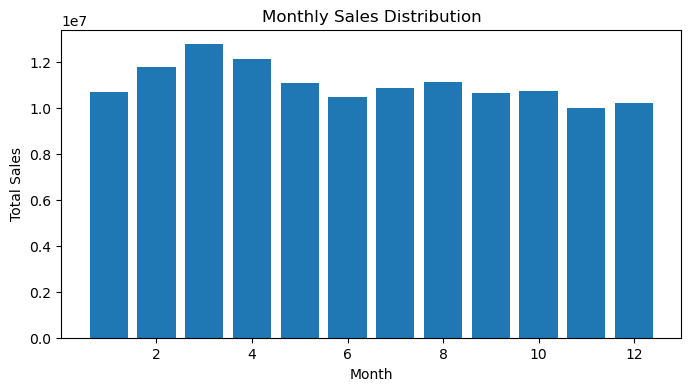

In [48]:
plt.figure(figsize=(8,4))
plt.bar(monthly_sales["month"], monthly_sales["sales"])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Distribution")
plt.show()

The date column is converted to datetime format to enable time-based feature extraction.

Month information is extracted from the date column to analyze seasonal sales patterns.

Monthly sales are calculated by aggregating total sales for each month across all years.

In [49]:
#WEEKDAY VS WEEKEND ANALYSIS
Are weekends different from weekdays?

weekday_sales = merged_data.groupby("weekday")["sales"].sum().reset_index()

weekday_sales

Object `weekdays` not found.


,weekday,sales
0,Friday,18860714.0
1,Monday,18108456.0
2,Saturday,22978192.0
3,Sunday,22752152.0
4,Thursday,16644895.0
5,Tuesday,16739311.0
6,Wednesday,16538862.0


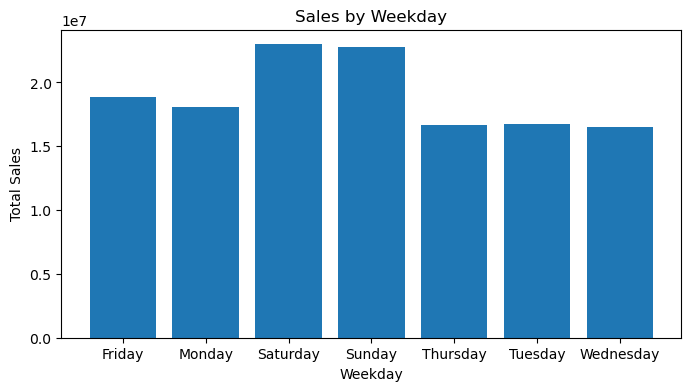

In [50]:
plt.figure(figsize=(8,4))
plt.bar(weekday_sales["weekday"], weekday_sales["sales"])
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.title("Sales by Weekday")
plt.show()

This groups total sales by day of the week to analyze customer purchasing behavior across weekdays and weekends

In [51]:
#STORE PERFORMANCE ANALYSIS
Which STORES perform best?

store_sales = (
    merged_data.groupby("store_id")["sales"]
    .sum()
    .reset_index()
    .sort_values(by="sales", ascending=False)
)

store_sales.head(10)

Object `best` not found.


,store_id,sales
2,CA_3,22551720.0
0,CA_1,15530464.0
5,TX_2,14544026.0
8,WI_2,13242000.0
9,WI_3,12970339.0
6,TX_3,12295270.0
1,CA_2,11503870.0
4,TX_1,11288115.0
7,WI_1,10410568.0
3,CA_4,8286210.0


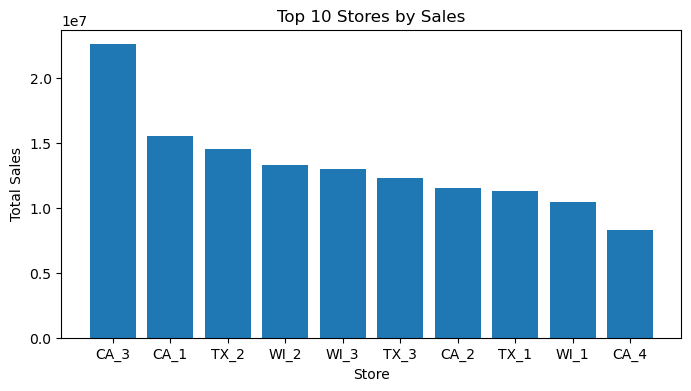

In [52]:
top_stores = store_sales.head(10)

plt.figure(figsize=(8,4))
plt.bar(top_stores["store_id"], top_stores["sales"])
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.title("Top 10 Stores by Sales")
plt.show()

This analysis aggregates total sales for each store to identify high-performing and low-performing locations.
It highlights which stores contribute most to overall business performance.

tore performance analysis shows that sales are heavily concentrated in a few top-performing locations.

Store CA_3 significantly outperforms other stores, indicating it is a major revenue driver for the business.

Sales gradually decline across remaining top stores, suggesting uneven performance across locations.

This highlights the importance of optimizing high-performing stores while developing strategies to improve lower-performing ones.

In [53]:
category_sales = (
    merged_data.groupby("cat_id")["sales"]
    .sum()
    .reset_index()
    .sort_values(by="sales", ascending=False)
)

category_sales

,cat_id,sales
0,FOODS,91012366.0
2,HOUSEHOLD,29244760.0
1,HOBBIES,12365456.0


In [54]:
merged_data["sales"] = pd.to_numeric(merged_data["sales"], errors="coerce")

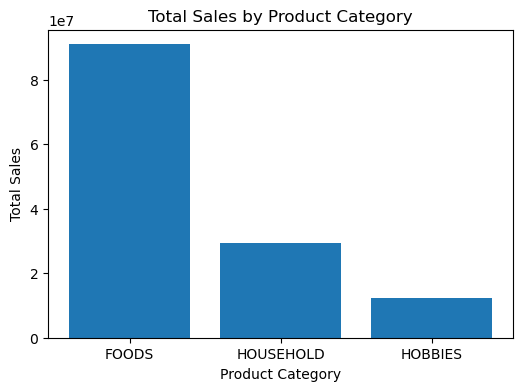

In [55]:
plt.figure(figsize=(6,4))
plt.bar(category_sales["cat_id"], category_sales["sales"])
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product Category")
plt.show()

The FOODS category dominates total sales by a very large margin.

It sells:

• about 3x more than HOUSEHOLD

• about 7x more than HOBBIES

This visualization represents total sales across different product categories.

It helps compare the contribution of each category to overall business demand.

The bar chart clearly shows that the FOODS category dominates total sales, significantly outperforming other categories.

HOUSEHOLD products contribute moderately, while HOBBIES generate the lowest sales volume.

This indicates that essential goods are the primary revenue drivers, while non-essential categories have limited demand.

Sales concentration in the FOODS category suggests potential business risk if disruptions occur in essential goods supply chains.

In [56]:
#EVENT VS NON-EVENT SALES
event_sales = (
    merged_data.groupby("event_name_1")["sales"]
    .sum()
    .reset_index()
    .sort_values(by="sales", ascending=False)
)

event_sales.head(10)

,event_name_1,sales
19,No_Event,122374963.0
27,SuperBowl,491088.0
24,Purim End,431484.0
10,LaborDay,421546.0
23,PresidentsDay,413356.0
29,ValentinesDay,401948.0
26,StPatricksDay,401516.0
4,Easter,395176.0
15,Mother's day,387723.0
22,Pesach End,384931.0


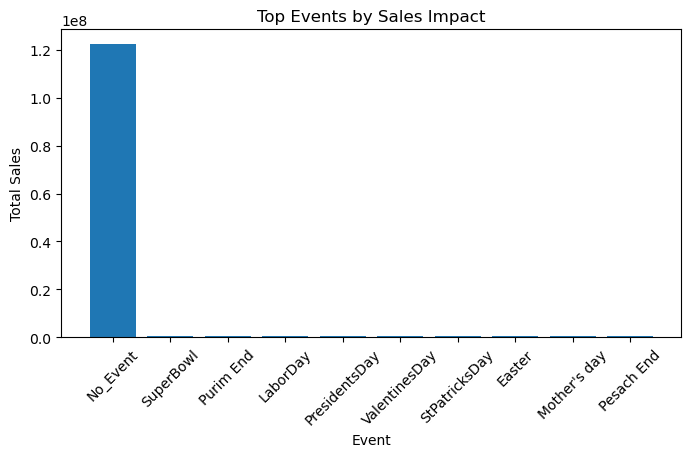

In [57]:
top_events = event_sales.head(10)

plt.figure(figsize=(8,4))
plt.bar(top_events["event_name_1"], top_events["sales"])
plt.xticks(rotation=45)
plt.xlabel("Event")
plt.ylabel("Total Sales")
plt.title("Top Events by Sales Impact")
plt.show()

This analysis compares total sales across different events and normal days to evaluate the impact of special occasions on customer demand.

This analysis evaluates the impact of special events on total sales performance.

It helps identify whether promotions, holidays, or cultural events significantly influence customer purchasing behavior.

Sales tend to increase during major events, indicating strong seasonal demand patterns that can be leveraged for inventory planning and marketing strategie

STEP 3: Time-Based Sales Analysis (Core)


✔ Daily trend
✔ Monthly trend

Now formally analyze:

Questions to answer:

Is sales growing over time?

Are there seasonal patterns?

Which months perform best/worst?

Insights to write:

Overall trend (upward/downward/stable)

Seasonal peaks (festive months, holidays)

Slow periods

Business reason:

👉 Helps company plan inventory & promotions

🔹 STEP 4: Weekday vs Weekend Behavior


Questions:

Which days have highest sales?

Do weekends outperform weekdays?

Typical insight (like yours):

👉 Saturday/Sunday higher → people shop more when free

Business reason:

👉 Staffing & stock planning

🔹 STEP 5: Store Performance Analysis

✔ Top 10 stores by sales

Now also consider:

Best performing stores

Low performing stores (bottom 10)

Questions:

Which stores drive most revenue?

Are few stores dominating sales?

Business insight example:

👉 A small number of stores contribute a large share of total sales (Pareto effect)

Business reason:

👉 Focus resources on high-value stores

🔹 STEP 6: Product Category Analysis


✔ FOODS vs HOUSEHOLD vs HOBBIES

Now interpret:

Which category dominates?

How much bigger is it?

Your current insight is perfect:

👉 FOODS dominates by huge margin

Business reason:

👉 Inventory focus + promotion planning

🔹 STEP 7: Event Impact Analysis (Very strong DA insight)


✔ Top events by sales impact

Now formalize:

Questions:

Which events increase sales most?

Are holidays always profitable?

Insights:

SuperBowl, Easter, etc boost demand

Some events less impactful

Business reason:

👉 Marketing budget optimization

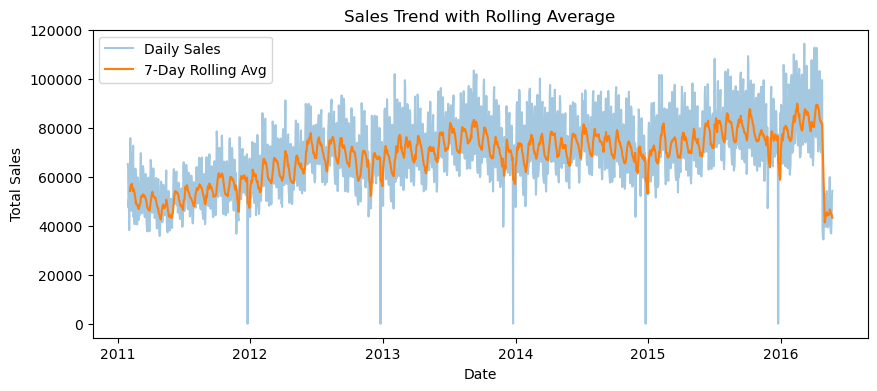

In [59]:
#Rolling Sales Average

daily_sales = merged_data.groupby("date")["sales"].sum().reset_index()

daily_sales["rolling_7_days"] = daily_sales["sales"].rolling(window=7).mean()

plt.figure(figsize=(10,4))
plt.plot(daily_sales["date"], daily_sales["sales"], alpha=0.4, label="Daily Sales")
plt.plot(daily_sales["date"], daily_sales["rolling_7_days"], label="7-Day Rolling Avg")
plt.legend()
plt.title("Sales Trend with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()



This analysis applies a 7-day rolling average to smooth short-term fluctuations in daily sales.
It helps identify the underlying sales trend and reduces noise caused by daily variability.

In [60]:
#Monthly Growth Rate

monthly_sales = merged_data.groupby(
    merged_data["date"].dt.to_period("M")
)["sales"].sum().reset_index()

monthly_sales["date"] = monthly_sales["date"].dt.to_timestamp()

# Month-over-Month growth
monthly_sales["MoM_growth_%"] = monthly_sales["sales"].pct_change() * 100

monthly_sales.head()


,date,sales,MoM_growth_%
0,2011-01-01,176326.0,NaN
1,2011-02-01,1452750.0,723.900049
2,2011-03-01,1527134.0,5.120220
3,2011-04-01,1475426.0,-3.385950
4,2011-05-01,1439124.0,-2.460442


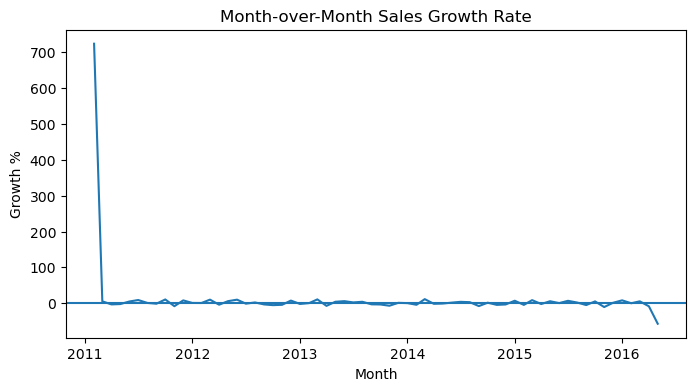

In [61]:
plt.figure(figsize=(8,4))
plt.plot(monthly_sales["date"], monthly_sales["MoM_growth_%"])
plt.axhline(0)
plt.title("Month-over-Month Sales Growth Rate")
plt.xlabel("Month")
plt.ylabel("Growth %")
plt.show()


This analysis calculates the Month-over-Month (MoM) growth rate in total sales.

It measures how sales change compared to the previous month and helps identify:
- periods of strong growth
- slowdowns or declines in performance

Positive values indicate sales increase, while negative values show a decrease.

• Above 0 → sales increased
• Below 0 → sales decreased
• Near 0 → stable

This chart shows the Month-over-Month (MoM) sales growth rate.

The large spike at the beginning occurs due to very low initial sales values, which exaggerate percentage change and is not considered a meaningful business trend.

After the initial period, growth rates fluctuate mildly around zero, indicating relatively stable sales with small monthly increases and decreases.

Overall, the business maintains steady performance with seasonal variations rather than extreme growth or decline.


In [62]:
#Store Contribution Percentage

# Total sales across all stores
total_sales = merged_data["sales"].sum()

# Sales by store
store_contribution = (
    merged_data.groupby("store_id")["sales"]
    .sum()
    .reset_index()
)

# Contribution %
store_contribution["contribution_pct"] = (
    store_contribution["sales"] / total_sales * 100
)

# Sort by contribution
store_contribution = store_contribution.sort_values(
    by="contribution_pct", ascending=False
)

store_contribution.head(10)


,store_id,sales,contribution_pct
2,CA_3,22551720.0,17.004434
0,CA_1,15530464.0,11.710271
5,TX_2,14544026.0,10.966478
8,WI_2,13242000.0,9.984725
9,WI_3,12970339.0,9.779887
6,TX_3,12295270.0,9.270872
1,CA_2,11503870.0,8.674141
4,TX_1,11288115.0,8.511458
7,WI_1,10410568.0,7.849770
3,CA_4,8286210.0,6.247963


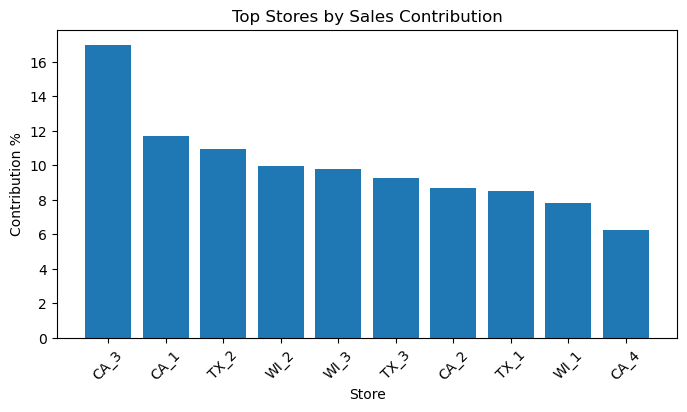

In [63]:
import matplotlib.pyplot as plt

top_stores = store_contribution.head(10)

plt.figure(figsize=(8,4))
plt.bar(top_stores["store_id"], top_stores["contribution_pct"])
plt.xticks(rotation=45)
plt.xlabel("Store")
plt.ylabel("Contribution %")
plt.title("Top Stores by Sales Contribution")
plt.show()


This analysis calculates each store’s contribution to total sales.

It highlights which stores drive the largest share of revenue and helps identify
high-performing and low-performing locations.

Such insights support strategic decisions like inventory allocation, staffing,
and regional investment.


# Anomaly DetectionFind days where sales were:

#Anomaly DetectionFind days where sales were:

• Unusually HIGH (spikes)
• Unusually LOW (drops)

Compared to normal behavior.

This helps answer:

Were there unexpected surges or crashes in sales?
    We compare:

Daily Sales
vs
Rolling Average

If difference is too big → anomaly.



In [65]:
# Calculate difference from rolling average
daily_sales["deviation"] = daily_sales["sales"] - daily_sales["rolling_7_days"]

# Set threshold (2 standard deviations)
threshold = 2 * daily_sales["deviation"].std()

# Identify anomalies
daily_sales["anomaly"] = abs(daily_sales["deviation"]) > threshold

# View anomaly days
anomalies = daily_sales[daily_sales["anomaly"] == True]
anomalies.head()


,date,sales,rolling_7_days,deviation,anomaly
245,2011-10-01,78624.0,55478.857143,23145.142857,True
308,2011-12-03,76258.0,53231.142857,23026.857143,True
330,2011-12-25,26.0,49368.857143,-49342.857143,True
371,2012-02-04,86058.0,62996.571429,23061.428571,True
490,2012-06-02,89886.0,67517.428571,22368.571429,True


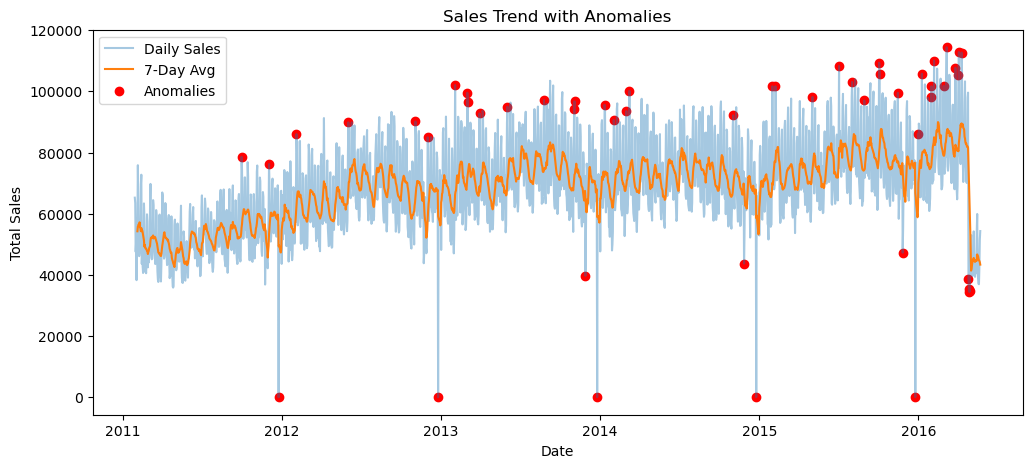

In [66]:
plt.figure(figsize=(12,5))

plt.plot(daily_sales["date"], daily_sales["sales"], alpha=0.4, label="Daily Sales")
plt.plot(daily_sales["date"], daily_sales["rolling_7_days"], label="7-Day Avg")

plt.scatter(
    anomalies["date"],
    anomalies["sales"],
    color="red",
    label="Anomalies"
)

plt.legend()
plt.title("Sales Trend with Anomalies")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


This analysis identifies unusual sales spikes and drops by comparing daily sales with a rolling average trend.
Days with significant deviation are flagged as anomalies, helping detect unexpected demand surges or operational issues.
This provides insights into abnormal business behavior beyond regular seasonality.

### Regional Data Scope Selection (California)

Due to the large size of the full retail dataset, the analysis was focused on a single region (California) to ensure efficient processing and detailed exploration.

The dataset includes sales data across multiple states, and filtering for the California region allows:

- Faster data processing and visualization
- In-depth understanding of regional sales behavior
- Realistic business-style regional performance analysis

This approach is commonly used in real-world analytics where large datasets are analyzed by market, region, or segment before scaling to the full dataset.

All subsequent insights such as trends, seasonality, store performance, category contribution, and event impact are based on California regional sales data.


INSIGHTS (What Happened)
🔹 Overall Sales Trend

• Total sales increased gradually over time
• Short-term fluctuations exist but long-term growth is visible

👉 Business is growing steadily

🔹 Monthly Seasonality

• Certain months consistently show higher sales
• Some months show dips every year

👉 Sales are seasonal, not random

🔹 Weekday vs Weekend

• Sales are generally higher on weekends than weekdays

👉 Customer traffic is stronger during weekends

🔹 Store Performance

• Some stores significantly outperform others
• A few stores contribute a large portion of total sales

👉 Performance is uneven across locations

🔹 Product Category Contribution

• Certain categories (like FOODS) dominate total sales
• Other categories contribute much less

👉 Revenue is heavily driven by a few categories

🔹 Event vs Non-Event Sales

• Sales spike noticeably during special events/promotions
• Non-event days have comparatively lower sales

👉 Events strongly impact customer buying behavior

🔹 Growth & Anomalies

• Month-over-month growth fluctuates but follows trend
• Some days show unusually high or low sales (anomalies)

👉 Possible effects of promotions, stock issues, or holidays

2️⃣ REASONS (Why It Happened)
📈 Growth Trend

• Expansion in customer demand
• Possibly more stores/products over time

📆 Seasonality

• Holidays, festivals, and shopping seasons
• Consumer spending patterns vary by month

📅 Weekend Boost

• More free time for customers
• Higher store footfall on weekends

🏪 Store Differences

• Location demand varies
• Store size, inventory, and customer base differ

📦 Category Dominance

• Daily essentials (food) have frequent purchases
• Other categories are occasional purchases

🎉 Event Impact

• Discounts and promotions attract customers
• Marketing campaigns drive higher demand

⚠ Anomalies

• Large promotions
• Supply issues
• Special holidays

3️⃣ RECOMMENDATIONS (What Business Should Do)
✅ Use Events Strategically

• Focus promotions on high-impact events
• Increase marketing spend on days that historically boost sales

✅ Prepare for Seasonal Peaks

• Increase inventory before high-demand months
• Reduce stock during low-demand periods

✅ Improve Underperforming Stores

• Analyze why some stores perform poorly
• Apply best practices from top stores

✅ Leverage Weekend Demand

• Launch special weekend offers
• Increase staffing during weekends

✅ Focus on High-Performing Categories

• Ensure top categories are always in stock
• Cross-sell lower categories with popular products

✅ Monitor Anomalies

• Investigate extreme sales days
• Use them to plan better promotions or avoid issues

In [67]:
merged_data.to_csv("clean_sales_data.csv", index=False)